## Problem 1: Basics of Clustering

(a)

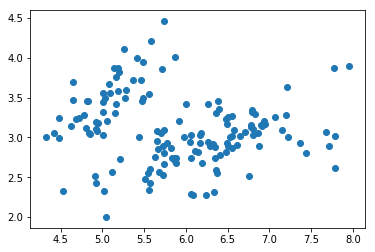

In [3]:
import numpy as np;
import matplotlib.pyplot as plt;
import mltools as ml;

iris = np.genfromtxt("data/iris.txt",delimiter=None);

X = iris[:,0:2];
Y = iris[:,-1];

plt.scatter(X[:,0], X[:,1])
plt.show()

(b)

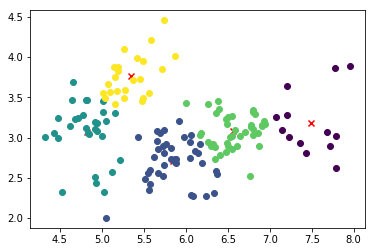

In [4]:
sumd = np.inf;
for iter in range(10):
    Zi,mui,sumdi = ml.cluster.kmeans(X,K=5,init='random');
#     print(iter, sumdi)
    # find the best score.
    if sumdi < sumd:
        Z,mu,sumd = Zi,mui,sumdi;
 
ml.plotClassify2D(None,X,Z);
plt.scatter(mu[:,0], mu[:,1], c='r', marker='x');
plt.show();

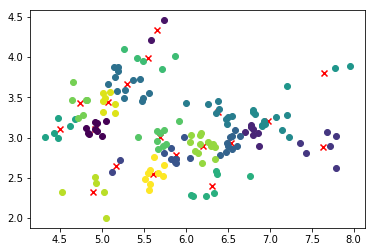

In [5]:
sumd = np.inf;
for iter in range(10):
    Zi,mui,sumdi = ml.cluster.kmeans(X,K=20,init='random');
    # find the best score.
    if sumdi < sumd:
        Z,mu,sumd = Zi,mui,sumdi;
 
ml.plotClassify2D(None,X,Z);
plt.scatter(mu[:,0], mu[:,1], c='r', marker='x');
plt.show();

(c)

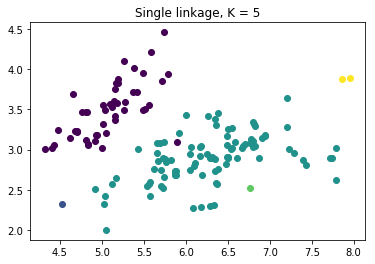

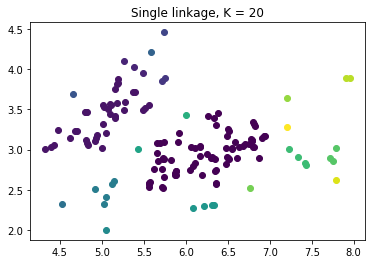

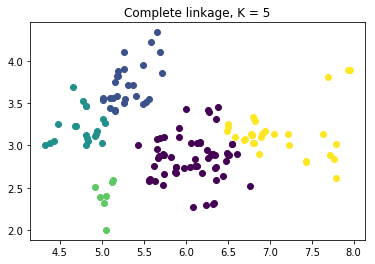

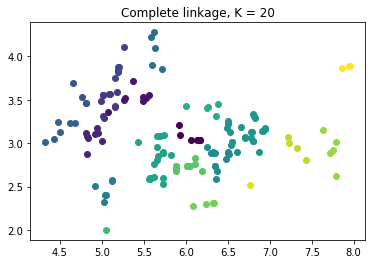

In [6]:
Z,Join = ml.cluster.agglomerative(X, K=5, method='min');
ml.plotClassify2D(None,X,Z);
plt.title("Single linkage, K = 5");
plt.show();

Z,Join = ml.cluster.agglomerative(X, K=20, method='min');
ml.plotClassify2D(None,X,Z);
plt.title("Single linkage, K = 20");
plt.show();

Z,Join = ml.cluster.agglomerative(X, K=5, method='max');
ml.plotClassify2D(None,X,Z);
plt.title("Complete linkage, K = 5");
plt.show();

Z,Join = ml.cluster.agglomerative(X, K=20, method='max');
ml.plotClassify2D(None,X,Z);
plt.title("Complete linkage, K = 20");
plt.show();

K-means generates better cluters here, and agglomerative algorithm is degraded by outliers of train dataset.

(d)

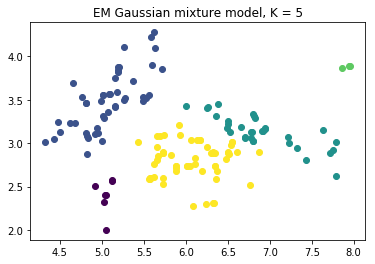

In [11]:
Z,_,_,ll = ml.cluster.gmmEM(X, K=5);

for i in range(10):
    Zi,_,_,lli = ml.cluster.gmmEM(X, K=5);
    if lli > ll:
        Z = Zi;
        ll = lli;
    
ml.plotClassify2D(None,X,Z);
plt.title("EM Gaussian mixture model, K = 5");
plt.show();


It may have a better clutering.

## Problem 2: EigenFaces

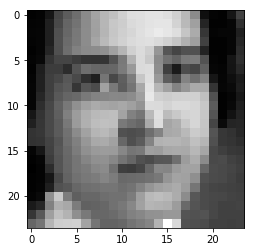

In [13]:
X = np.genfromtxt("data/faces.txt", delimiter=None);
plt.figure();
img = np.reshape(X[2,:],(24,24));
plt.imshow( img.T , cmap="gray");

(a)

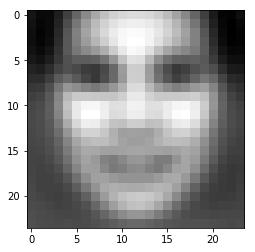

In [17]:
mu = X.mean(axis=0, keepdims=True);
X0 = X - mu;
img = np.reshape(mu[0,:],(24,24));
plt.figure();
plt.imshow( img.T , cmap="gray");

(b)

In [5]:
import scipy.linalg

U,S,V = scipy.linalg.svd(X0, full_matrices=False);
W = U.dot(np.diag(S));
print(W.shape, V.shape)

(4916, 576) (576, 576)


(c)

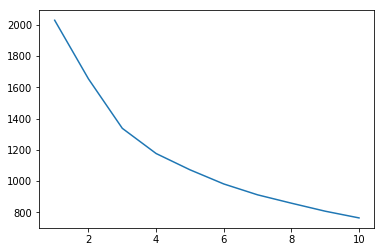

In [8]:
mse = [];

for k in range(1,11):
    X0hat = W[:,:k].dot(V[:k,:]);
    mse.append(np.mean( (X0-X0hat)**2 ));

plt.plot(list(range(1,11)), mse);
plt.show()

(d)

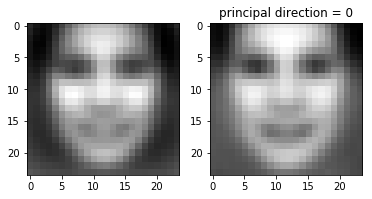

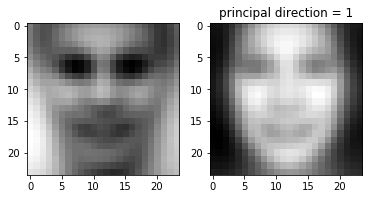

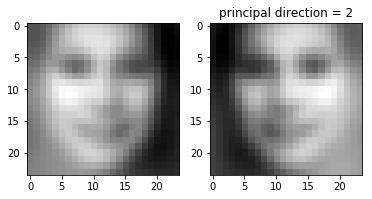

In [18]:
for j in range(3):
    alpha = 2*np.median(np.abs(W[:,j])); 
    img1 = np.reshape(mu + alpha * V[j,:], (24,24));
    img2 = np.reshape(mu - alpha * V[j,:], (24,24));
    f,(ax1,ax2) = plt.subplots(1,2);
    plt.title("principal direction = " + str(j))
    ax1.imshow( img1.T , cmap="gray");
    ax2.imshow( img2.T , cmap="gray");
    plt.show();

(e)

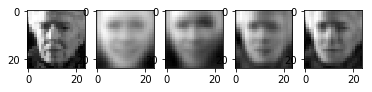

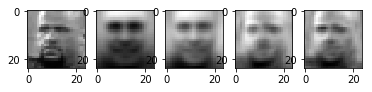

In [31]:
for i in np.floor( 4916*np.random.rand(2) ).astype('int'):
    img = X[i,:];
    img = np.reshape(img, (24,24));
    f,ax = plt.subplots(1,5);
    ax[0].imshow(img.T, cmap='gray');
    
    for j,k in enumerate([5,10,50,100]):
        img = mu + W[i,0:k].dot(V[0:k,:]);
        img = np.reshape(img, (24,24));
        ax[j+1].imshow(img.T, cmap='gray');
        
    plt.show();

(f)

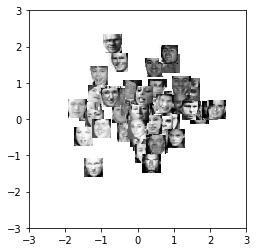

In [28]:
idx = np.floor( 4916*np.random.rand(50) ).astype('int');

coord,params = ml.transforms.rescale( W[:,0:2] ) 
plt.figure(); 

for i in idx:
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) )
    plt.imshow( img.T , cmap="gray", extent=loc ) 
    plt.axis( (-3,3,-3,3) )